In [1]:
from classificador import *


🎯 Acurácia: 68.00%


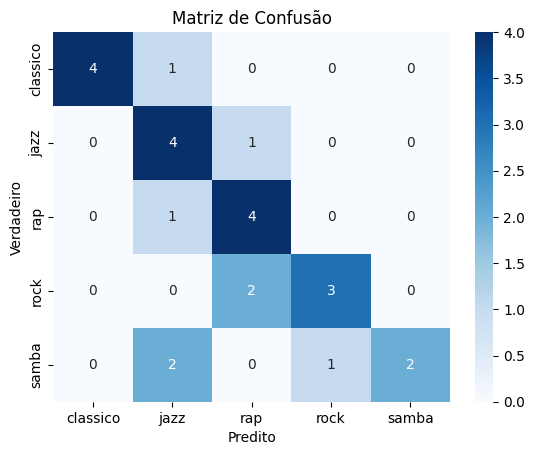

In [2]:
# Caminho para o dataset com subpastas por gênero
dataset_path = "audio"

# Carregando os dados (por exemplo, 5 treinos por gênero)
X_train, y_train, X_test, y_test, test_files = load_dataset(dataset_path, n_train=10, n_test=5)

# Classificação com PCA
y_pred, X_train_pca, X_test_pca, pca_model = pca_classification(
    X_train, y_train, X_test, y_test, n_components=10
)

# Avaliação dos resultados
evaluate(y_test, y_pred)


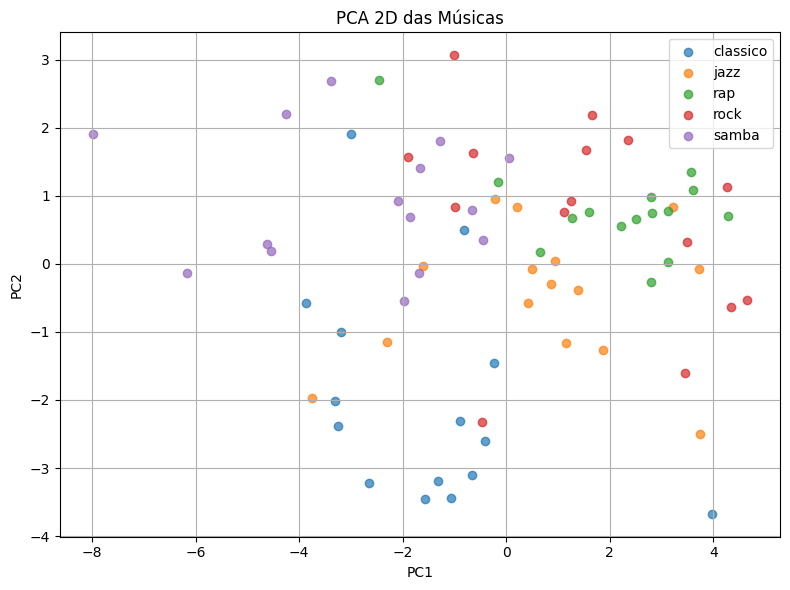

In [3]:
plot_pca_2d(np.vstack([X_train, X_test]), np.concatenate([y_train, y_test]), title="PCA 2D das Músicas")

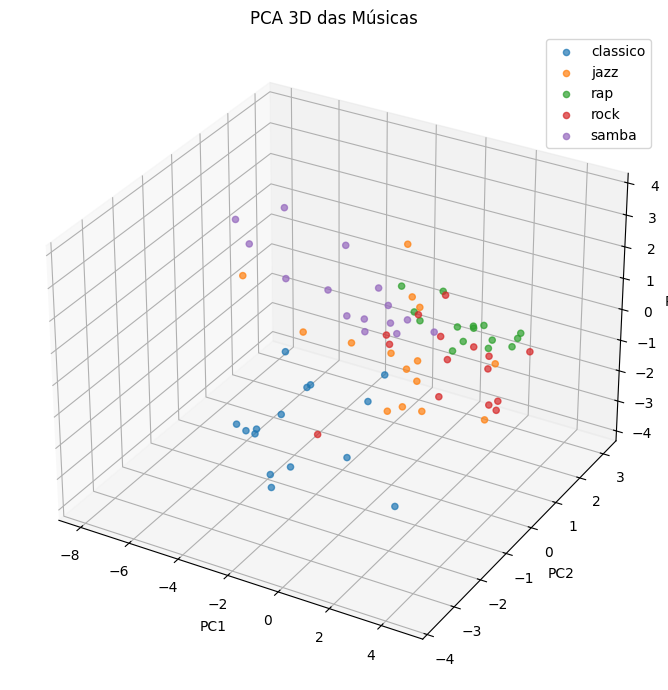

In [4]:

plot_pca_3d(np.vstack([X_train, X_test]), np.concatenate([y_train, y_test]), title="PCA 3D das Músicas")

In [5]:

# Geração de tabela de distâncias (opcional)
centroides = {g: X_train_pca[np.array(y_train) == g].mean(axis=0) for g in np.unique(y_train)}
df_dist = gerar_tabela_distancias(X_test_pca, y_test, test_files, y_train, X_train_pca, centroides)

# Visualizar ou salvar
print(df_dist.head())
df_dist.to_csv("distancias_aos_centroides.csv", index=False)

                                             Arquivo Verdadeiro   Predito  \
0                 03 - Overture ((Lone Ranger)).flac   classico  classico   
1                      Igor Levit - II. Andante.flac   classico  classico   
2                        Fazil Say - I. Allegro.flac   classico  classico   
3  02 - 4. In The Hall Of The Mountain King ((Alt...   classico      jazz   
4                   Nelson Freire - 1. Overture.flac   classico  classico   

   classico      jazz       rap      rock     samba Mais_proximo  Dist_min  
0  2.555177  4.069215  5.748162  4.925117  2.981117     classico  2.555177  
1  4.409507  5.328837  6.665791  6.172230  6.512693     classico  4.409507  
2  2.286041  4.002646  5.621710  5.016528  5.223098     classico  2.286041  
3  6.186957  4.990969  5.275144  5.292725  9.124914         jazz  4.990969  
4  2.031844  5.011080  6.433248  5.643242  4.245418     classico  2.031844  


In [6]:
def gerar_tabela_probabilidades(X_test_pca, y_test, test_files, y_train, X_train_pca, centroides, epsilon=1e-10):
    """
    Gera um DataFrame com probabilidades baseadas nas distâncias aos centróides.
    """
    dados = []
    generos = list(centroides.keys())

    for i, x in enumerate(X_test_pca):
        # Calcula distâncias
        distancias = {g: np.linalg.norm(x - c) for g, c in centroides.items()}
        
        # Inverso das distâncias
        inversos = {g: 1 / (d + epsilon) for g, d in distancias.items()}
        soma_inversos = sum(inversos.values())

        # Probabilidades normalizadas
        probabilidades = {g: inv / soma_inversos for g, inv in inversos.items()}
        genero_predito = max(probabilidades, key=probabilidades.get)

        dados.append({
            'Arquivo': test_files[i],
            'Verdadeiro': y_test[i],
            'Predito': genero_predito,
            **probabilidades,
            'Mais_provavel': genero_predito,
            'Prob_max': probabilidades[genero_predito]
        })

    df = pd.DataFrame(dados)
    return df


In [7]:
df_probs = gerar_tabela_probabilidades(X_test_pca, y_test, test_files, y_train, X_train_pca, centroides)
print(df_probs.head())
df_probs.to_csv("probabilidades_classificacao.csv", index=False)


                                             Arquivo Verdadeiro   Predito  \
0                 03 - Overture ((Lone Ranger)).flac   classico  classico   
1                      Igor Levit - II. Andante.flac   classico  classico   
2                        Fazil Say - I. Allegro.flac   classico  classico   
3  02 - 4. In The Hall Of The Mountain King ((Alt...   classico      jazz   
4                   Nelson Freire - 1. Overture.flac   classico  classico   

   classico      jazz       rap      rock     samba Mais_provavel  Prob_max  
0  0.289992  0.182094  0.128907  0.150449  0.248558      classico  0.289992  
1  0.257701  0.213242  0.170472  0.184104  0.174480      classico  0.257701  
2  0.348291  0.198921  0.141631  0.158717  0.152440      classico  0.348291  
3  0.190133  0.235695  0.222998  0.222257  0.128916          jazz  0.235695  
4  0.390632  0.158390  0.123375  0.140647  0.186956      classico  0.390632  
